In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import cv2

In [ ]:
# Storing path of the data set and getting all types of defects present
data_path = "../data/raw/train/images"

defects = sorted(os.listdir(data_path))
print("Classes:", defects)


Classes: ['crazing', 'inclusion', 'patches', 'pitted_surface', 'rolled-in_scale', 'scratches']


In [16]:
# Visualising a sample of defects through image for further analysis

def show_sample_images(base_path, classes, n = 5):
    # Getting fath for individual defect folder
    for idx, cls in enumerate(classes):
        cls_path = os.path.join(base_path, cls)
        images = os.listdir(cls_path)[:n]

        # Reading image file and plotting them
        for i,image in enumerate(images):
            img_path = os.path.join(cls_path, image)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

            plt.subplot(len(defects), n, idx*n +i +1)
            plt.imshow(img, cmap='gray')

            if i == 0:
                plt.ylabel(cls, fontsize=6)
                
        
    
    plt.suptitle("Sample of different types of Defects")
    plt.tight_layout()
    plt.show()

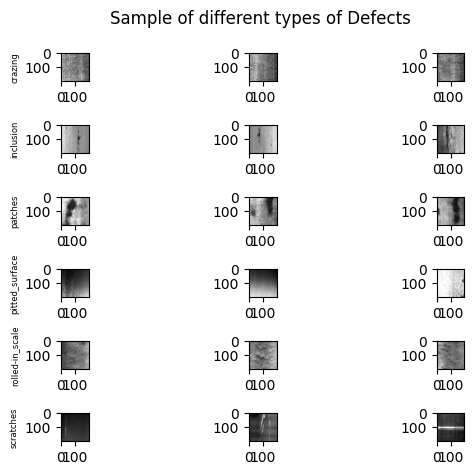

In [17]:
# Plotting the images
show_sample_images(data_path, defects, 3)

{'crazing': 240, 'inclusion': 240, 'patches': 240, 'pitted_surface': 240, 'rolled-in_scale': 240, 'scratches': 240}


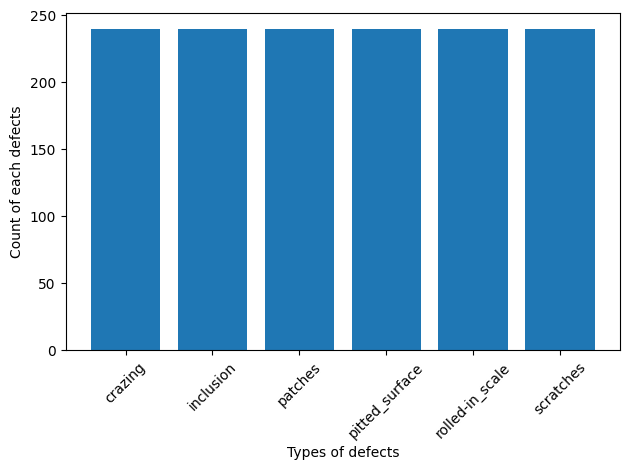

In [23]:
# Getting distribution of defects

defects_count = {}

for defect in defects:
    def_path = os.path.join(data_path, defect)
    defects_count[defect] = len(os.listdir(def_path))

print(defects_count)


plt.bar(defects_count.keys(), defects_count.values())
plt.xlabel("Types of defects")
plt.ylabel("Count of each defects")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
# Getting values of size of images

image_size = []

for defect in defects:
    def_path = os.path.join(data_path, defect)
    images = os.listdir(def_path)

    for image in images:
        img_path = os.path.join(def_path, image)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        image_size.append(img.shape)


Counter(image_size)

Counter({(200, 200): 1440})

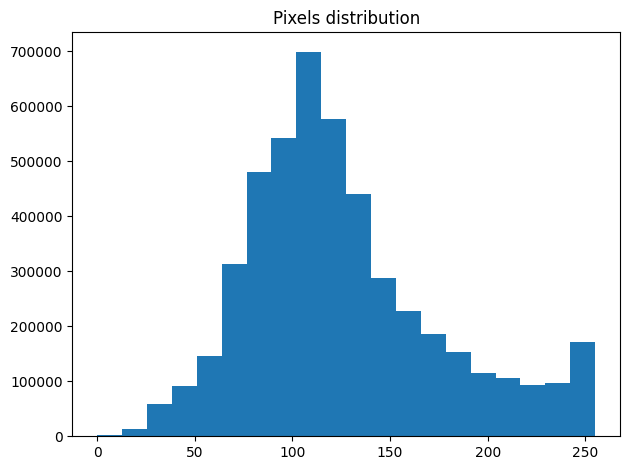

In [26]:
# Analysing values of pixels for further processing during modelling

pixels_info = []

for defect in defects:
    def_path = os.path.join(data_path, defect)
    images = os.listdir(def_path)[:20]

    for image in images:
        img_path = os.path.join(def_path, image)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        pixels_info.extend(img.flatten())

plt.hist(pixels_info, bins=20)
plt.title("Pixels distribution")
plt.tight_layout()
plt.show()
